In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import convolve as conv
%matplotlib inline

def randint(inrange):
    r = np.ceil(np.random.rand(1)*inrange)
    return r

In [32]:
# %load cvcr.py
import numpy as np

def cvcr(f,g, cvcr = 'conv'):
    #fourier transform functions
    f_fft = np.fft.fft(f)
    g_fft = np.fft.fft(g)

    if cvcr == 'conv':
        fcvg = np.fft.ifft(f_fft*g_fft)
        fcvgr = fcvg.real
        return fcvgr
    elif cvcr == 'corr':
        fcrg = np.fft.ifft(f_fft*g_fft.conj())
        fcrgr = fcrg.real
        return fcrgr



In [2]:
# %load delay.py
import numpy as np

def delay(a, dt=0):
    if dt==0:
        #With delay zero, the array should remain
        #unchanged.
        return a
    elif dt>0:
        rand = np.random.rand(dt)
        # d is the shifted original array
        # ex. if original = [A,B,C] i = 2
        # then d_original = [rand1, rand2, A]
        d = np.concatenate((rand, a[:-rand.shape[0]]), axis=0)
        return d


In [3]:
samp = 4096

def sine(a, b, amp=1, phase=0,freq=2*np.pi, samp=samp):
    points = np.linspace(a,b,samp)
    sine = amp*np.sin(freq*points-phase)
    return sine

In [23]:
# Noise from sources
n_1 = np.random.randn(samp)*1
n_2 = np.random.randn(samp)*1

# Noise from source 1 seen by antenna 1
n1_a1 = delay(n_1)
# Noise from source 2 seeb by antenna 1
n2_a1 = delay(n_2,2000)

# Noise from source 1 seen by antenna 2
n1_a2 = delay(n_1,300)
# Noise from source 2 seen by antenna 2
n2_a2 = delay(n_2)

In [24]:
print np.random.rand(10)

[ 0.72421082  0.03776334  0.81177564  0.57201619  0.93083552  0.94041884
  0.88306085  0.24527947  0.40515982  0.82449906]


In [25]:
r_amp= randint(1)
r_pha = randint(20)
r_freq = randint(np.pi)

r2_amp= randint(1)
r2_pha = randint(20)
r2_freq = randint(5*np.pi)

# Signals of interest
s1_a1 = sine(0, 2*np.pi, r_amp, r_pha,r_freq, samp)
s1_a2 = delay(s1_a1, 300)
# s1_a2 = sine(0, 2*np.pi, r_amp , r_pha-randint(500), r_freq, samp)

# s2_a1 = sine(0, 2*np.pi, r2_amp, r2_pha-randint(800),r2_freq, samp)
s2_a2 = sine(0, 2*np.pi, r2_amp , r2_pha, r2_freq, samp)
s2_a1 = delay(s2_a2, 790)

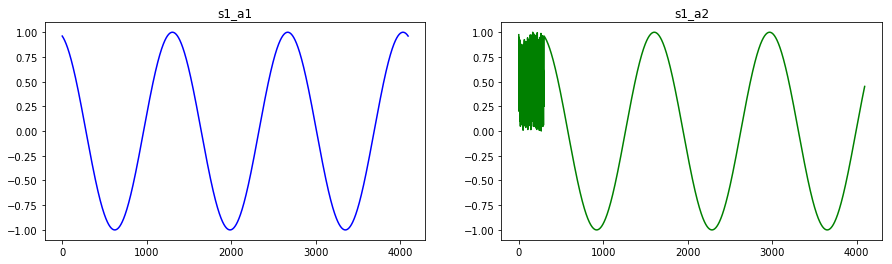

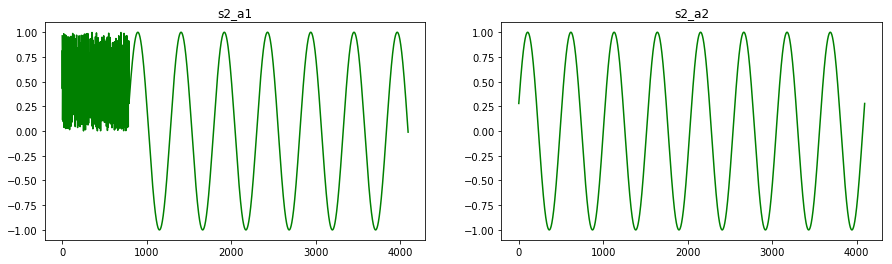

In [26]:
# s1_a2 = delay(s_1,2000)
# s2_a2 = delay(s_2,0)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,4))
ax1.plot(s1_a1, c='b'); ax1.set_title('s1_a1')
ax2.plot(s1_a2, c='g'); ax2.set_title('s1_a2')

fig, (ax3,ax4) = plt.subplots(1,2,figsize=(15,4))
ax3.plot(s2_a1, c='g'); ax3.set_title('s2_a1')
ax4.plot(s2_a2, c='g'); ax4.set_title('s2_a2')

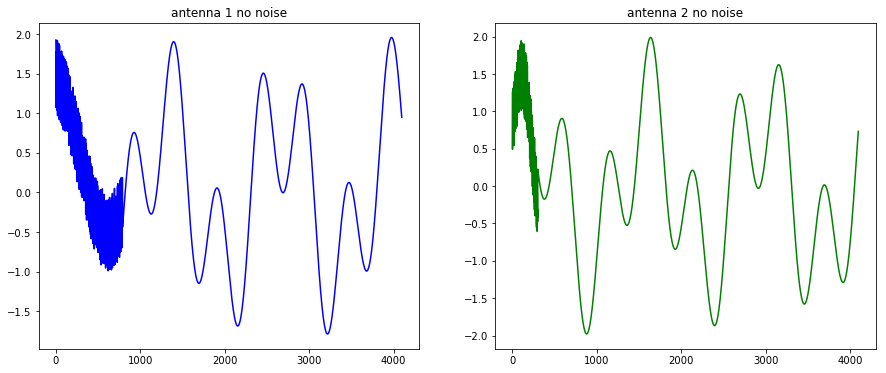

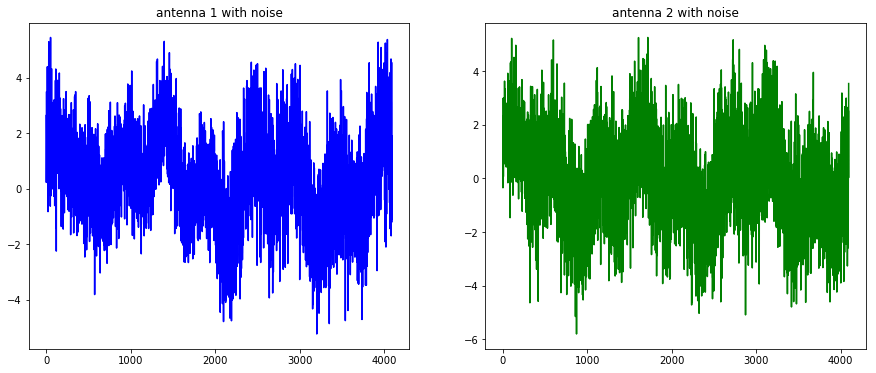

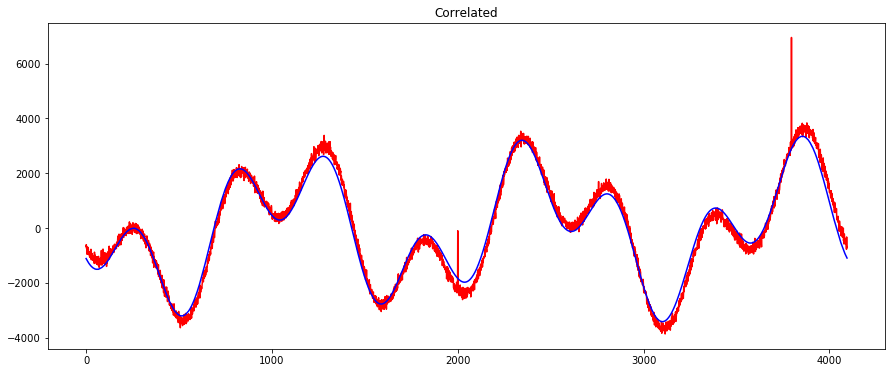

In [33]:
v1 = n1_a1 + n2_a1 + s1_a1 + s2_a1
v2 = n1_a2 + n2_a2 + s1_a2 + s2_a2

v_1 = s1_a1 + s2_a1
v_2 = s1_a2 + s2_a2
# v1convv2=conv(v1,v2[::-1],'same')
# v_1convv_2=conv(v_1,v_2[::-1], 'same')
v1convv2 = cvcr(v1,v2, 'corr')
v_1convv_2=cvcr(v_1,v_2, 'corr')

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
ax1.plot(v_1, c='b'); ax1.set_title('antenna 1 no noise')
ax2.plot(v_2, c='g'); ax2.set_title('antenna 2 no noise')

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
ax1.plot(v1, c='b'); ax1.set_title('antenna 1 with noise')
ax2.plot(v2, c='g'); ax2.set_title('antenna 2 with noise')

fig, (ax_1) = plt.subplots(1,figsize=(15,6))
ax_1.plot(v1convv2, c='r')
ax_1.plot(v_1convv_2, c='b'); ax_1.set_title('Correlated')
# ax_2.plot(np.fft.fftshift(np.fft.fft(np.fft.fftshift(v_1convv_2)))); #ax_2.set_xlim(4060,4120)

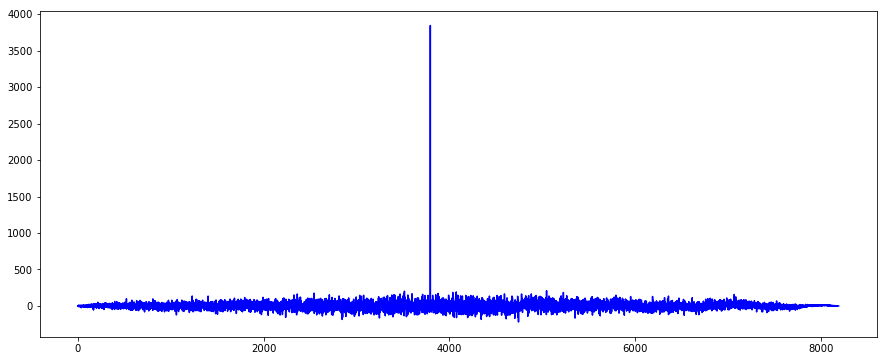

In [31]:
vn1 = n1_a1 #+ n2_a1
vn2 = n1_a2 #+ n2_a2

vn1convvn2 = conv(vn1,vn2[::-1], 'full')


fig, (ax_1) = plt.subplots(1,figsize=(15,6))
ax_1.plot(vn1convvn2, c='b')

In [12]:
a = np.array([1,1,1,1,2])
zeros = np.zeros(1000)

_a = np.concatenate((zeros, a), axis =0)
_a_ = np.concatenate((_a, zeros), axis = 0)

In [13]:
conva=np.convolve(_a_,_a_, 'full')
convash = np.fft.fftshift(np.convolve(_a_,_a_, 'full'))

x_coords = np.linspace(-4,4,9)
print x_coords


[-4. -3. -2. -1.  0.  1.  2.  3.  4.]


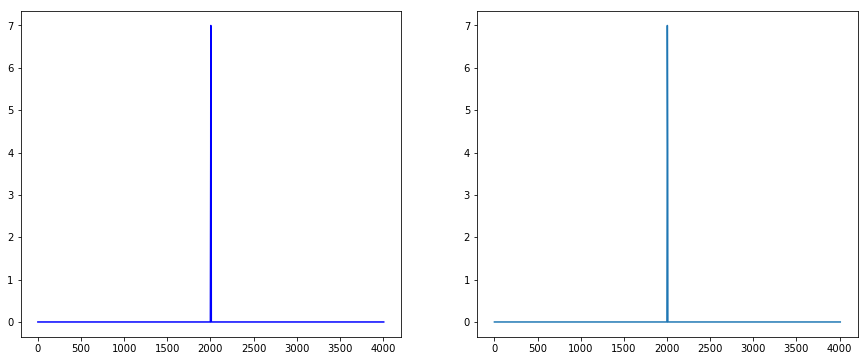

In [14]:
fig, (ax_1,ax2) = plt.subplots(1,2,figsize=(15,6))
ax_1.plot(conva, c='b')
ax2.plot(conva)



In [19]:
# %load cvcr.py
import numpy as np

def cvcr(f,g, cvcr ='conv'):
    #fourier transform functions
    f_fft = np.fft.fft(f)
    g_fft = np.fft.fft(g)

    if cvcr == 'conv':
        return np.fft.ifft(f_fft*g_fft)
    
    elif cvcr == 'corr':
        return np.fft.ifft(f_fft*g_fft.conj())


In [25]:
a = np.arange(4)+1
print a

[1 2 3 4]


In [33]:
acr = cvcr(a,a, 'corr')
anpcv = np.convolve(a,a, 'same')
print acr

[ 30.+0.j  24.+0.j  22.+0.j  24.+0.j]
[ 4 10 20 25]
